# Time Series Analysis Practice

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
df = pd.read_csv("./data/department-sales.csv", index_col="Date", parse_dates=True)
df.head()

,Weekly_Sales,IsHoliday
Date,,
05/02/2010,24924.50,False
12/02/2010,46039.49,True
19/02/2010,41595.55,False
26/02/2010,19403.54,False
05/03/2010,21827.90,False


In [16]:
# Changing the format of the date
df.index = pd.to_datetime(df.index, format="%d/%m/%Y")
df.head()

,Weekly_Sales,IsHoliday
Date,,
2010-02-05,24924.50,False
2010-02-12,46039.49,True
2010-02-19,41595.55,False
2010-02-26,19403.54,False
2010-03-05,21827.90,False


In [21]:
df.shape

(143, 2)

In [20]:
# Setting the Frequency to Weekly
df.index.freq = "W-FRI"
df.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[us]', name='Date', length=143, freq='W-FRI')

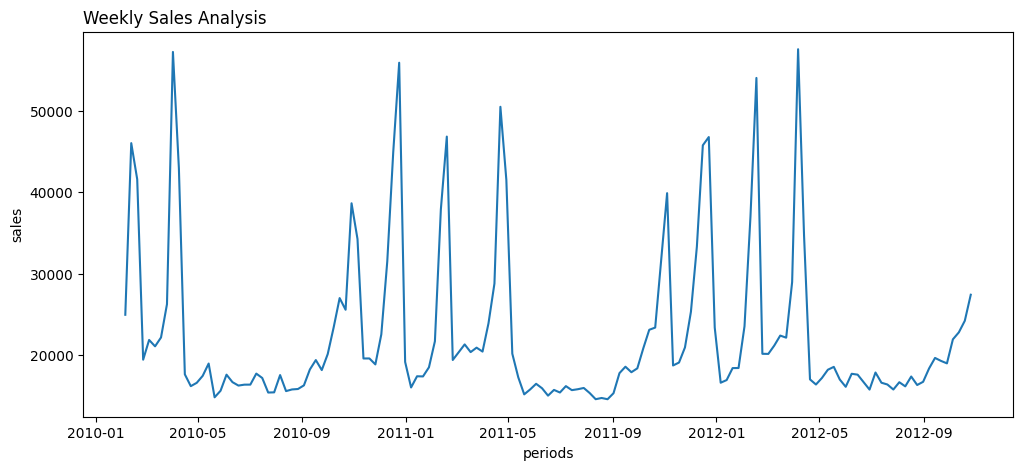

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(df["Weekly_Sales"])
plt.xlabel("periods")
plt.ylabel("sales")
plt.title("Weekly Sales Analysis", loc="left")
plt.show()

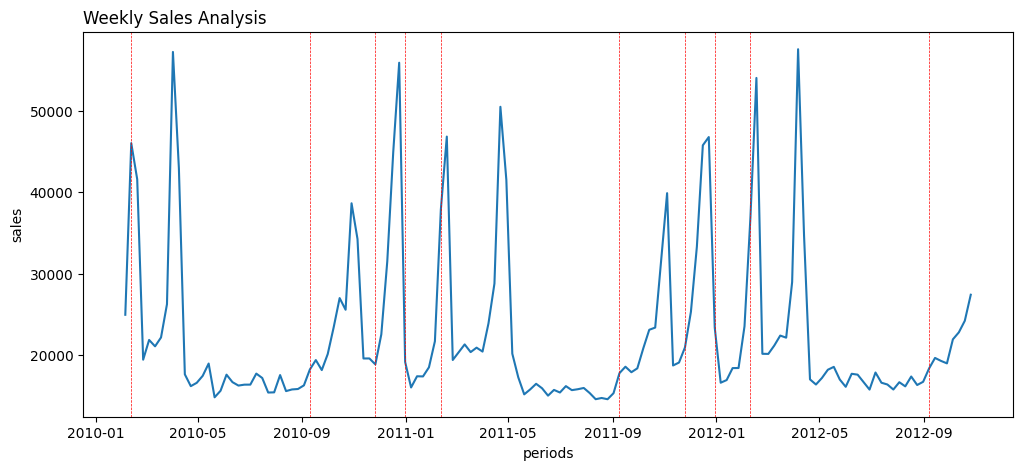

In [ ]:
# Plot with holidays demonstration
plt.figure(figsize=(12, 5))
plt.plot(df["Weekly_Sales"])

for date, row, in df.iterrows():
    if row["IsHoliday"]:
        plt.axvline(date, color="red", ls="--", lw=0.5)
    
plt.xlabel("periods")
plt.ylabel("sales")
plt.title("Weekly Sales Analysis", loc="left")
plt.show()

### Plotting Autocorrelation

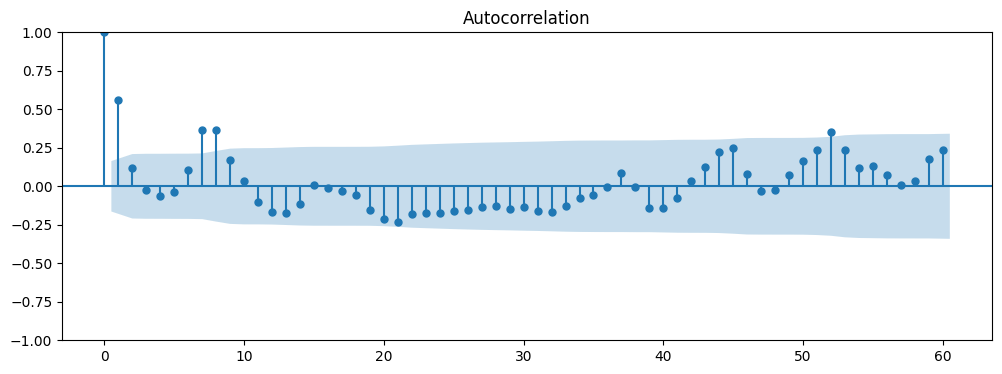

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(df["Weekly_Sales"], lags=60, ax=ax)
plt.show()

### Plotting Partial Autocorrelation

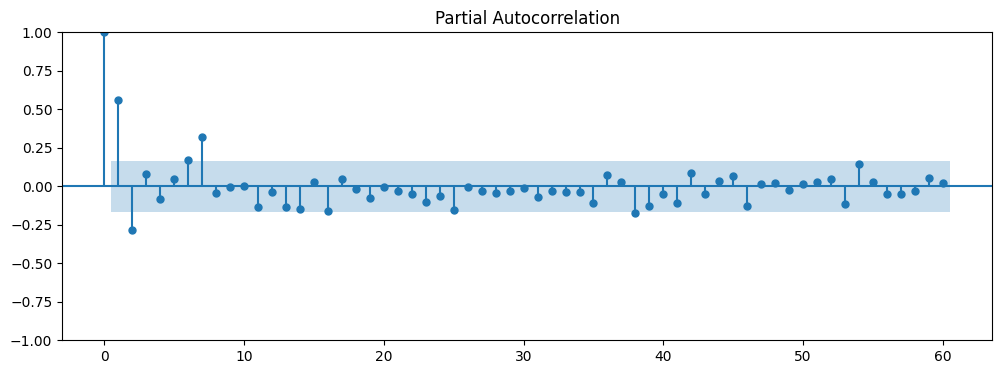

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(df["Weekly_Sales"], lags=60, ax=ax)
plt.show()

### Seasonal Decomposition

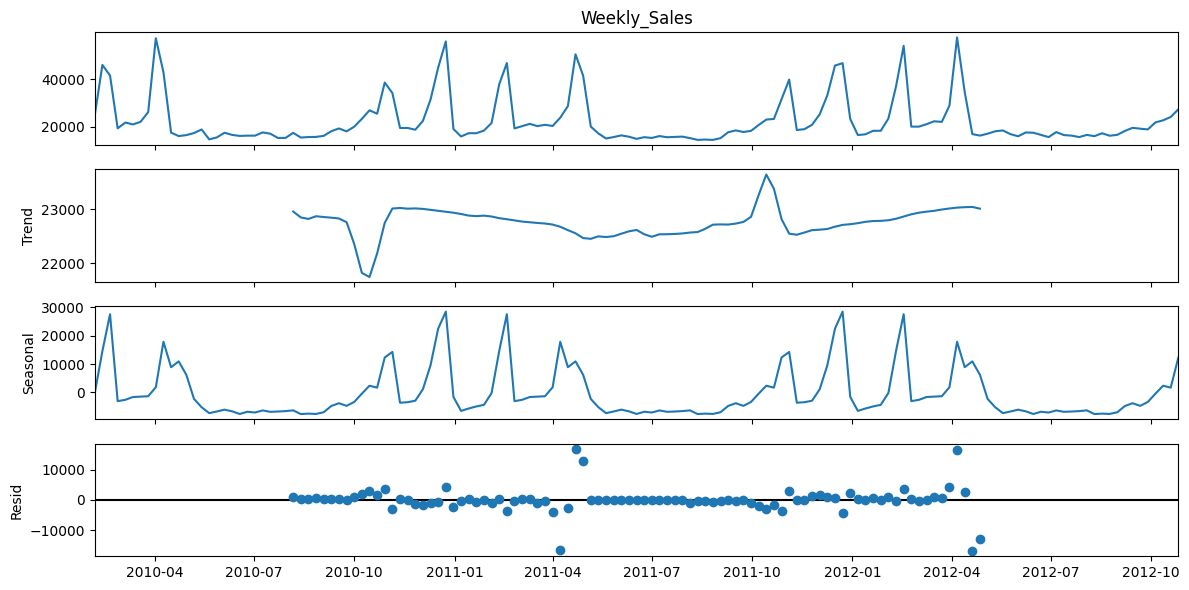

In [43]:
# fig, ax = plt.subplots(figsize=(12, 4))
decomposition = seasonal_decompose(x=df["Weekly_Sales"], period=52)
fig = decomposition.plot()
fig.set_tight_layout('tight')
fig.set_size_inches(12, 6)